## Exploratory Data Analysis

### Load Datasets: Technology, Patent, Agreement datasets from Minuet, cleaned for descriptive and modeling purposed (see Date Preprocessing.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import missingno as msno
import plotly.graph_objects as go
%matplotlib inline

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

### Technology Dataset: Contatins Status that will be used for licensing output variable and addditional information on the invention

### Patent Dataset: Contains Status that will be used for patent issuance output variable and additional information on the patenting process 

### Agreement Dataset: Contains additional information on licensing agreements 

In [181]:
# Technology Dataset 
df_tech = pd.DataFrame(pd.read_csv("Tech_cleaned.csv"))
print("Technology Shape:", df_tech.shape)

# Patent Dataset 
df_pat = pd.DataFrame(pd.read_csv("patentData_Cleaned.csv"))
print("Patent Shape:", df_pat.shape)

# Agreement Dataset 
df_ag = pd.DataFrame(pd.read_csv("Agreement_cleaned.csv"))
print("Agreement Shape:", df_ag.shape)

Technology Shape: (3909, 86)
Patent Shape: (6843, 33)
Agreement Shape: (3843, 23)


## Patent EDA 

### Primary_Key and Tech_ID have no nulls, as excpected for PKs. 62% missing Issue_Date, can we assume 48% of dataset has an issued patent? Date fields contain most null values. We will look at how date fileds connect with each other later on

In [182]:
num_missing = df_pat.isnull().sum()
percentage_missing = num_missing/len(df_pat)*100
print(percentage_missing)

Unnamed: 0                 0.000000
Tech_ID                    0.000000
Title                      0.000000
Serial_Number              0.759901
Patent_Number             12.129183
Country                    0.000000
Country_WIPO_ID            0.000000
File_Date                  0.526085
Issue_Date                62.048809
Publication_Number        18.412977
Date_Actually_Filed       21.481806
Internal_ID                0.000000
Entity_Size                0.000000
Priority_Date              0.789128
Status_Date               68.566418
Is_Priority                5.143943
Last_Related_Update        0.000000
Status                     0.248429
Lawfirm                    3.916411
Attorney                  27.341809
Legal_Reference_Number    11.778460
Inventors                  0.131521
Application_Type           0.000000
Created_Date               0.000000
Docket_No                  7.569779
Expire_Date                6.444542
IP_Manager                 0.000000
Lead_Inventor              0

### Dates, IDs, Titles, Descriptions, Individuals (Examiner) will largely be unique. We can consider using the following for correlation analysis:  Application_Type, Status, Country, Lawfirm, Attorney, IP Manager, Licensing Manager

In [183]:
df_pat.nunique()

Unnamed: 0                6843
Tech_ID                   1507
Title                     2445
Serial_Number             6687
Patent_Number             1729
Country                     90
Country_WIPO_ID             89
File_Date                 2413
Issue_Date                1342
Publication_Number        2084
Date_Actually_Filed       3120
Internal_ID               6843
Entity_Size                  3
Priority_Date             1515
Status_Date                760
Is_Priority                  2
Last_Related_Update        139
Status                      19
Lawfirm                    120
Attorney                   197
Legal_Reference_Number    2960
Inventors                 1567
Application_Type            14
Created_Date               543
Docket_No                 5445
Expire_Date               3092
IP_Manager                  13
Lead_Inventor              506
Licensing_Manager           12
Primary_Key               6843
Publication_Date          1361
Technology_Key            1507
Licensed

### Missing values appear to be relatively evenly distributed accross the rows, which is good

<AxesSubplot:>

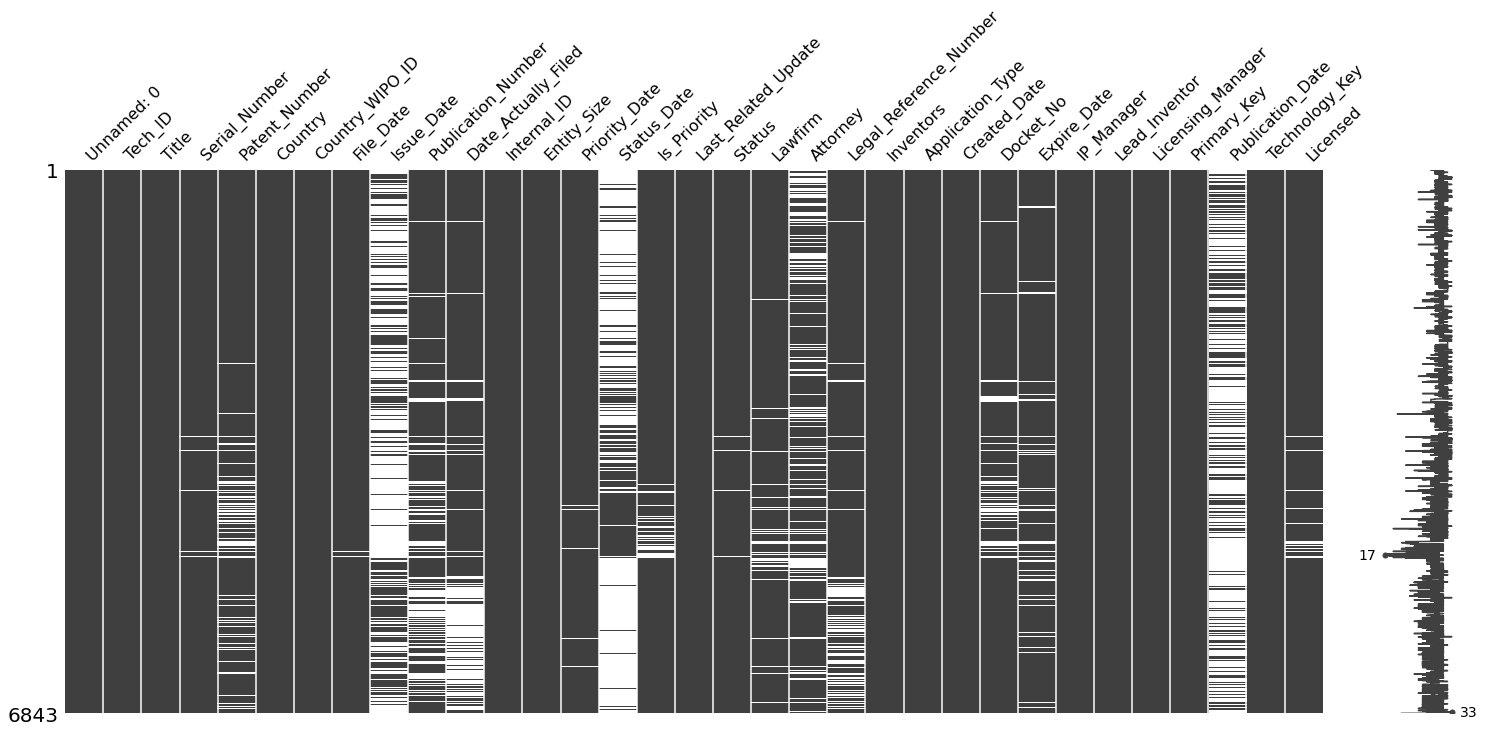

In [184]:
# Gives positional information of the missing values
msno.matrix(df_pat)

### High Probability that, if Issue_Date is null, Patent_Number will be null as well. Other columns that have high correlation of associated null values are Priority_Application_Number/Docker_No and File_Date/Serial_No.

### If Nationalized_Date is null, there is a relatively high probability that Docket_No will not be, and vice versa

<AxesSubplot:>

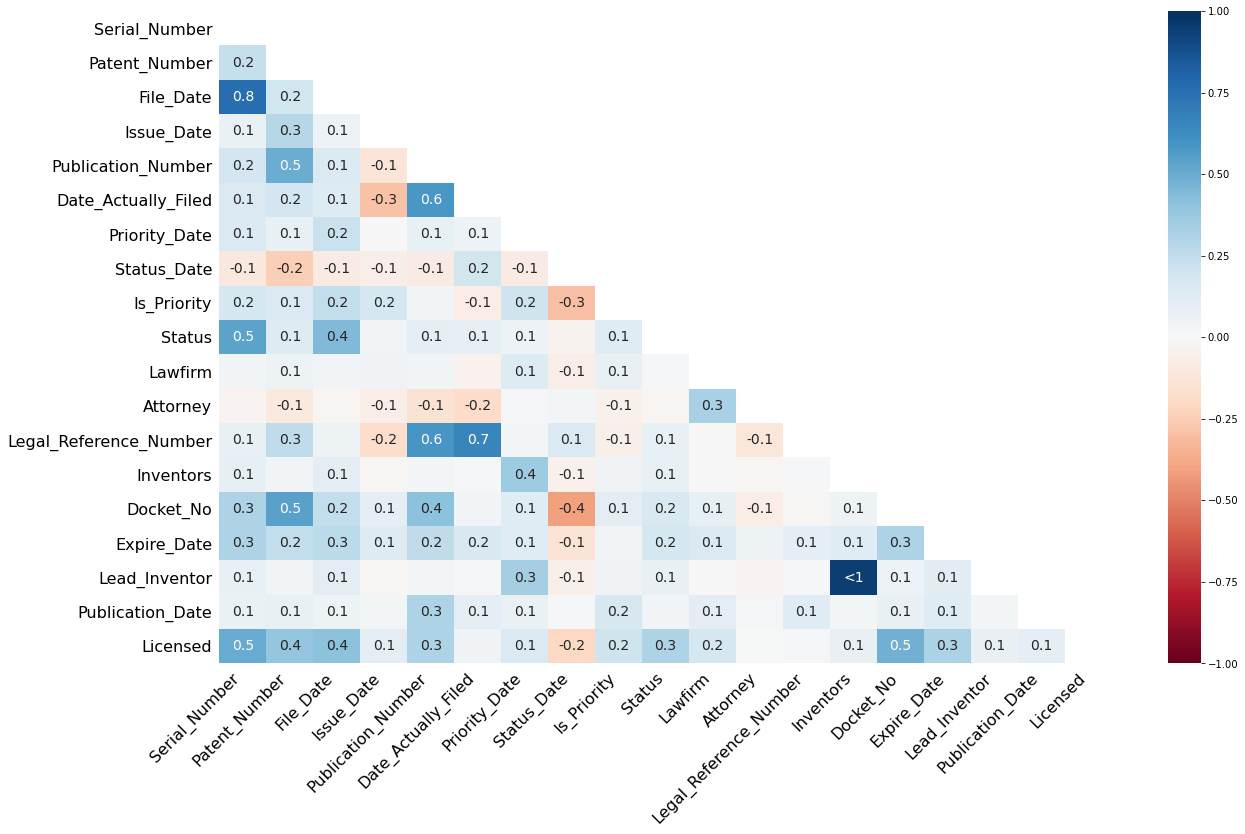

In [185]:
# Gives a heatmap of how missing values are related
msno.heatmap(df_pat)

### Separate records with a missing Law Firm to determine if there is a primary reason for the missing values

In [186]:
lawFirm = df_pat[df_pat['Lawfirm'].isna()]

### The primary commonality between these cases were that they have older File_Date listings (mostly stemming from the 1970's and 1980's). These were most likely instances with associted data quality issues. The team will update the NA values to "No Lawfirm"

In [187]:
lawFirm.head()

,Unnamed: 0,Tech_ID,Title,Serial_Number,Patent_Number,Country,Country_WIPO_ID,File_Date,Issue_Date,Publication_Number,...,Created_Date,Docket_No,Expire_Date,IP_Manager,Lead_Inventor,Licensing_Manager,Primary_Key,Publication_Date,Technology_Key,Licensed
225,225,01-T-002,Controlled Directional Scattering Cavity for T...,"06/113,155","4,359,265",*United States,US,1/18/1980,11/16/1982,,...,4/12/2018,0118.1-001,1/18/2000,"Ginsburg, Eric",Roland Winston,"Juggernauth, Anne",611336,NaN,580939,Yes
226,226,01-T-003,Radiant Energy Collector,"06/121,541","4,419,984",*United States,US,2/14/1980,12/13/1983,,...,4/12/2018,0118.2-001,12/13/2000,"Unassigned, Unassigned",William McIntyre,"Unassigned, Unassigned",614264,NaN,580940,Yes
374,374,01-T-033,"SNP-Cruncher, Version 1.0",TXu-1-033-477,TXu-1-033-477,*United States,US,1/8/2002,1/8/2002,NaN,...,4/12/2018,0903-001,1/8/2022,"Butler, Brittany",Elliot Gershon,"Butler, Brittany",614573,NaN,581940,Yes
528,528,02-T-001,Particle Beam Lens,"07/249,857",,*United States,US,9/27/1988,NaN,,...,4/12/2018,0220.1-001,NaN,"Unassigned, Unassigned",Zhifeng Shao,"Unassigned, Unassigned",613893,NaN,580941,Yes
623,623,02-T-038,Device and Method for Pressure-Driven Plug Tra...,10174435.7EPO,2302389,European Patent Office (EPO),EP,5/9/2003,1/24/2018,,...,4/12/2018,0996-019,5/9/2023,"Hwang, Luke",Rustem Ismagilov,"Ginsburg, Eric",611426,NaN,582032,Yes


In [188]:
num_missing = lawFirm.isnull().sum()
percentage_missing = num_missing/len(lawFirm)*100
print(percentage_missing)

Unnamed: 0                  0.000000
Tech_ID                     0.000000
Title                       0.000000
Serial_Number               2.238806
Patent_Number              20.895522
Country                     0.000000
Country_WIPO_ID             0.000000
File_Date                   1.865672
Issue_Date                 72.388060
Publication_Number         25.373134
Date_Actually_Filed        13.432836
Internal_ID                 0.000000
Entity_Size                 0.000000
Priority_Date               6.716418
Status_Date                53.358209
Is_Priority                13.059701
Last_Related_Update         0.000000
Status                      0.746269
Lawfirm                   100.000000
Attorney                   98.507463
Legal_Reference_Number     11.194030
Inventors                   0.000000
Application_Type            0.000000
Created_Date                0.000000
Docket_No                  19.029851
Expire_Date                24.626866
IP_Manager                  0.000000
L

### Convert NA values in Lawfirm field to "No Lawfirm" and confirm NA values have been removed

In [189]:
df_pat['Lawfirm'].fillna('No Lawfirm', inplace=True)
print(percentage_missing)

Unnamed: 0                  0.000000
Tech_ID                     0.000000
Title                       0.000000
Serial_Number               2.238806
Patent_Number              20.895522
Country                     0.000000
Country_WIPO_ID             0.000000
File_Date                   1.865672
Issue_Date                 72.388060
Publication_Number         25.373134
Date_Actually_Filed        13.432836
Internal_ID                 0.000000
Entity_Size                 0.000000
Priority_Date               6.716418
Status_Date                53.358209
Is_Priority                13.059701
Last_Related_Update         0.000000
Status                      0.746269
Lawfirm                   100.000000
Attorney                   98.507463
Legal_Reference_Number     11.194030
Inventors                   0.000000
Application_Type            0.000000
Created_Date                0.000000
Docket_No                  19.029851
Expire_Date                24.626866
IP_Manager                  0.000000
L

### Per guidance from Polsky Center, the following are considered dates of interest: 

Priority Date - moving to filing 

File Date -  prosecution

Nationalized Date - prosecution

Date Actually Filed - prosecution (probably cleanest)

Publication Date - prosecution

Issue Date - patent issued

Status Date - last date someone looked at the patent (not relevant to the process itself)

### Convert Date fields for analysis. We will convert all associated date fields in the dataset

In [190]:
# Date fields of interest identified by the Polsky Center 
df_pat['Priority_Date'] = pd.to_datetime(df_pat['Priority_Date'])
df_pat['File_Date'] = pd.to_datetime(df_pat['File_Date'])
#df_pat['Nationalized_Date'] = pd.to_datetime(df_pat['Nationalized_Date'])
df_pat['Date_Actually_Filed'] = pd.to_datetime(df_pat['Date_Actually_Filed'])
df_pat['Publication_Date'] = pd.to_datetime(df_pat['Publication_Date'])
df_pat['Issue_Date'] = pd.to_datetime(df_pat['Issue_Date'])

# Confirm that date fields have been converted 
df_pat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6843 entries, 0 to 6842
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              6843 non-null   int64         
 1   Tech_ID                 6843 non-null   object        
 2   Title                   6843 non-null   object        
 3   Serial_Number           6791 non-null   object        
 4   Patent_Number           6013 non-null   object        
 5   Country                 6843 non-null   object        
 6   Country_WIPO_ID         6843 non-null   object        
 7   File_Date               6807 non-null   datetime64[ns]
 8   Issue_Date              2597 non-null   datetime64[ns]
 9   Publication_Number      5583 non-null   object        
 10  Date_Actually_Filed     5373 non-null   datetime64[ns]
 11  Internal_ID             6843 non-null   object        
 12  Entity_Size             6843 non-null   object  

### Calculate Date Difference between Priority Date to Issue Date and Issue Date to Date Actually Filed, excluding continuation and divisional application types 

In [191]:
# Priority Date to Issuance Date 
df_pat['Priority_to_Issue'] = (df_pat['Issue_Date'] - df_pat['Priority_Date']).astype('timedelta64[M]')

# Issuance Date to Date Actually Filed 
df_pat['Filing_to_Issue'] = (df_pat['Issue_Date'] - df_pat['Date_Actually_Filed']).astype('timedelta64[M]')

# Exclude continuations and divisionals for analysis purposes
df_pat_exclusions = df_pat[(df_pat['Application_Type'] != 'Continuation') & (df_pat['Application_Type'] != 'Divisional')]

# For the purposes of this analysis, we will use the df excluding continuations and divisionals, but will keep them in main df
print("Priorty-to-Issuance (Months):", df_pat_exclusions['Priority_to_Issue'].describe())
print("\nFiling_to_Issue (Months):", df_pat_exclusions['Filing_to_Issue'].describe())

Priorty-to-Issuance (Months): count    2193.000000
mean       80.717282
std        37.111717
min       -23.000000
25%        57.000000
50%        78.000000
75%       100.000000
max       235.000000
Name: Priority_to_Issue, dtype: float64

Filing_to_Issue (Months): count    1401.000000
mean       32.752320
std        32.879749
min       -39.000000
25%         0.000000
50%        29.000000
75%        53.000000
max       169.000000
Name: Filing_to_Issue, dtype: float64


### Priorty Date to Issuance Date shows a largely Gaussian distribution with the majority of cases taking 50-100 months 

### In most cases Non-Provisional is filed about a year after provisional, but some may go directly to Non-Provisional

[Text(0.5, 1.0, 'Priority Date to Issuance Date (Months)')]

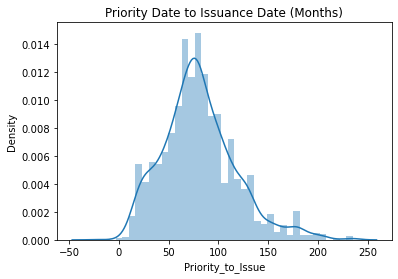

In [192]:
sns.distplot(df_pat_exclusions["Priority_to_Issue"]).set(title='Priority Date to Issuance Date (Months)')

### Identify cases with a negative date difference, extract for review 

In [193]:
neg_priority_to_issue = df_pat[df_pat['Priority_to_Issue'] < 0]
#neg_priority_to_issue.to_csv(r"C:\Users\Nick's Laptop\Desktop\Capstone\gitStaging\negative_priority_to_issuance.csv", sep=',')
neg_priority_to_issue.head()

,Unnamed: 0,Tech_ID,Title,Serial_Number,Patent_Number,Country,Country_WIPO_ID,File_Date,Issue_Date,Publication_Number,...,Expire_Date,IP_Manager,Lead_Inventor,Licensing_Manager,Primary_Key,Publication_Date,Technology_Key,Licensed,Priority_to_Issue,Filing_to_Issue
5378,5378,91-T-038,Methods and Compositions for Amplification and...,"06/585,850","4,481,049",*United States,US,1986-09-19,1984-11-06,NaN,...,9/19/2006,"Dembo, Anna",Bernard Roizman,"Tennant, Thelma",612650,NaT,581363,Yes,-23.0,NaN


### We need to confirm what is going on here with Polsky Center

### Team will review cases where there is a spike around 0 (should not have cases where there is no difference between Filling Date and Issuance Date) 

[Text(0.5, 1.0, 'Date Actually Filed to Issuance Date (Months)')]

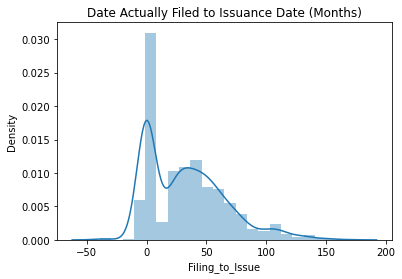

In [194]:
sns.distplot(df_pat_exclusions["Filing_to_Issue"]).set(title='Date Actually Filed to Issuance Date (Months)')

In [195]:
neg_filing_to_issue = df_pat[df_pat['Filing_to_Issue'] < 0]
#neg_filing_to_issue.to_csv(r"C:\Users\Nick's Laptop\Desktop\Capstone\gitStaging\negative_filing_to_issuance.csv", sep=',')
neg_filing_to_issue.head()

,Unnamed: 0,Tech_ID,Title,Serial_Number,Patent_Number,Country,Country_WIPO_ID,File_Date,Issue_Date,Publication_Number,...,Expire_Date,IP_Manager,Lead_Inventor,Licensing_Manager,Primary_Key,Publication_Date,Technology_Key,Licensed,Priority_to_Issue,Filing_to_Issue
67,67,00-T-027,Liver X Receptor Agonists,02731581.1IE,1392713,Ireland,IE,2002-05-02,2007-10-17,1392713,...,5/2/2022,"Dembo, Anna",Shutsung Liao,"Tennant, Thelma",612108,2004-03-03,581866,Yes,77.0,-4.0
68,68,00-T-027,Liver X Receptor Agonists,02731581.1IT,1392713,Italy,IT,2002-05-02,2007-10-17,1392713,...,5/2/2022,"Dembo, Anna",Shutsung Liao,"Tennant, Thelma",612109,2004-03-03,581866,Yes,77.0,-4.0
92,92,00-T-032,Control of Growth and Repair of Gastro-Intesti...,02728619.4FR,1415154,France,FR,2002-03-29,2009-10-21,,...,3/29/2022,"Dembo, Anna",F. Gary Toback,"Tennant, Thelma",611311,NaT,581871,Yes,102.0,-1.0
93,93,00-T-032,Control of Growth and Repair of Gastro-Intesti...,02728619.4GB,1415154,United Kingdom,GB,2002-03-29,2009-10-21,,...,3/29/2022,"Dembo, Anna",F. Gary Toback,"Tennant, Thelma",611312,NaT,581871,Yes,102.0,-1.0
94,94,00-T-032,Control of Growth and Repair of Gastro-Intesti...,02728619.4ES,1415154,Spain,ES,2002-03-29,2009-10-21,,...,3/29/2022,"Dembo, Anna",F. Gary Toback,"Tennant, Thelma",611313,NaT,581871,Yes,102.0,-2.0


### Check cases with 0 months of difference between filing and issuance for further review 

### These could be instances where Date_Actually_Filed was copied from the Issuance_Date

In [196]:
zero_filing_to_issue = df_pat[df_pat['Filing_to_Issue'] == 0]
zero_filing_to_issue['Filing_to_Issue_Days'] = (df_pat['Issue_Date'] - df_pat['Date_Actually_Filed']).astype('timedelta64[D]')
#zero_filing_to_issue.to_csv(r"C:\Users\Nick's Laptop\Desktop\Capstone\gitStaging\zero_filing_to_issuance.csv", sep=',')

### Create 'Patent_Status' column based on Guidance from Polsky Center: 

1 = Patented: Everything with a valid issue date + Status='Allowed', 'Issued', 'Granted', 'Authorized' 

2 = Pending: Status = 'Opposition', 'In Appeal', 'In Interference', 'Pending'

3 = Abandoned: Status= 'Abandoned', 'Expired - Inactive', 'Expired Prov - Filed PCT', 'Prosecution by Other Party', 'Released to Inventors', 'Released to Government'

4 = Ignore: Status= 'Expired PCT - Nationalized', 'Expired Prov - Filed in US', 'Expired PCT - Filed in US only', 'Registered (TM)', 'Registered (Copyright)'

In [197]:
# Generate lists for the patented, pending, and abandonded statuses
patented = ('Allowed', 'Issued', 'Granted', 'Authorized')
pending = ('Opposition', 'In Appeal', 'In Interference', 'Pending')
abandoned = ('Abandoned', 'Expired - Inactive', 'Expired Prov - Filed PCT', 'Prosecution by Other Party', 'Released to Inventors', 'Released to Government')
ignore = ('Expired PCT - Nationalized', 'Expired Prov - Filed in US', 'Expired PCT - Filed in US only', 'Registered (TM)', 'Registered (Copyright)')

df_pat.loc[(df_pat['Issue_Date'].notnull()) | (df_pat['Status'].isin(patented)), 'Patent_Status'] = 1
df_pat.loc[df_pat['Status'].isin(pending), 'Patent_Status'] = 2
df_pat.loc[df_pat['Status'].isin(abandoned), 'Patent_Status'] = 3
df_pat.loc[df_pat['Status'].isin(ignore), 'Patent_Status'] = 4

In [198]:
# check how many patented rows have a valid issue date
df_pat.loc[df_pat['Status'].isin(patented)]['Issue_Date'].describe()

count                     904
unique                    461
top       2020-02-12 00:00:00
freq                       37
first     2004-04-07 00:00:00
last      2022-07-05 00:00:00
Name: Issue_Date, dtype: object

### Team to review cases with an Patented Status but no Issuance Date

In [199]:
# Almost everything in 'Allowed', 'Issued', 'Granted', 'Authorized' has a valid patent issue date
print(len(df_pat.loc[df_pat['Status'].isin(patented)]))
print(df_pat.loc[df_pat['Status'].isin(patented)]['Issue_Date'].notnull().sum())

962
904


### Compare these cases specifically with Patsnap

In [200]:
no_issuance_date = df_pat[(df_pat['Status'].isin(patented)) & (df_pat['Issue_Date'].isna())]
no_issuance_date.to_csv(r"C:\Users\Nick's Laptop\Desktop\Capstone\gitStaging\no_issuance_date.csv", sep=',')

In [201]:
df_pat.loc[df_pat['Issue_Date'].notnull()]['Status'].value_counts()

Abandoned                     1009
Issued                         868
Expired - Inactive             545
Prosecution by Other Party      76
Granted                         36
Released to Inventors           29
Registered (TM)                 16
Registered (Copyright)          15
Opposition                       2
In Appeal                        1
Name: Status, dtype: int64

### The majority of inventions have a status of abandonded. Approximately 1,000 inventions have been successfully patented, 800 are pending, and 200 are not being reviewed for the purposes of this analysis

### Should cases we are ignoring be dropped from the dataset? These can be removed for now 

In [202]:
df_pat['Patent_Status'].value_counts()/len(df_pat)*100

3.0    70.246968
1.0    14.058162
2.0    11.749233
4.0     3.697209
Name: Patent_Status, dtype: float64

Text(0.5, 1.0, 'Patent_Status Distribution')

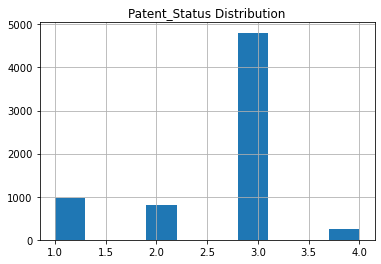

In [203]:
df_pat['Patent_Status'].hist()
plt.title("Patent_Status Distribution")

### We see that the null values in the new 'Patent_Status' column matches the null values in the original 'Status' column, confirming we have classified all viable records

In [204]:
print('Null values in Patent_Status column:', df_pat.Patent_Status.isnull().sum())
print('Null values in Status column:', df_pat.Status.isnull().sum())

Null values in Patent_Status column: 17
Null values in Status column: 17


### The 4 records without an associated status have been removed from the Patents dataset

In [205]:
df_pat = df_pat[df_pat['Status'].notna()]
len(df_pat)

6826

### Create a df converting categorical variables to numeric for correlation analysis

In [206]:
df_pat_num = df_pat.copy()

df_pat_num['Application_Type'] =df_pat_num['Application_Type'].astype('category').cat.codes
df_pat_num['Country'] =df_pat_num['Country'].astype('category').cat.codes
df_pat_num['Lawfirm'] =df_pat_num['Lawfirm'].astype('category').cat.codes
df_pat_num['Attorney'] =df_pat_num['Attorney'].astype('category').cat.codes
df_pat_num['IP_Manager'] =df_pat_num['IP_Manager'].astype('category').cat.codes
df_pat_num['Licensing_Manager'] =df_pat_num['Licensing_Manager'].astype('category').cat.codes

### Review how each numeric variable relates to Patent_Status. 

### Country has the strongest correlation to Patent Status. Licensing Manager also has somewhat of a correlation. But generally, there is not any major correlation between any one variable and Patent_Status. This may mean we need to develop or add new columns 

In [207]:
df_pat_num[df_pat_num.columns[1:]].corr()['Patent_Status'][:]

Country             -0.183052
Lawfirm              0.003397
Attorney            -0.027598
Application_Type     0.006450
IP_Manager          -0.107173
Licensing_Manager    0.112071
Primary_Key         -0.283161
Technology_Key      -0.058463
Priority_to_Issue   -0.122444
Filing_to_Issue      0.036633
Patent_Status        1.000000
Name: Patent_Status, dtype: float64

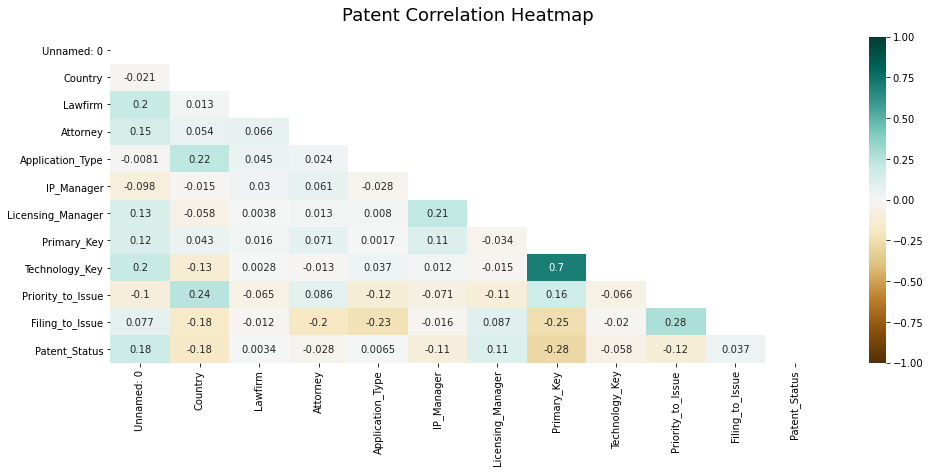

In [208]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_pat_num.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_pat_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Patent Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### Look at Priority to Issue by Lawfirm

### We can potentially add Current/Historical Lawfirm category. Some instances like University of Chicago are placeholders. Some lawfirms have particular expertise, which is why they are employed on certain patents. This can be done by looking at associated filing dates within last n years

### Potential analysis: look at Lawfirms/Attourneys with particularly speedy Priority to Issue time

In [209]:
pat_by_lawfirm = df_pat.groupby('Lawfirm').agg({'Priority_to_Issue':'mean', 'Primary_Key':'count'}).reset_index().set_axis(['Lawfirm', 'Priority_to_Issue', 'total_patent'], axis=1).sort_values('Priority_to_Issue')
pat_by_lawfirm

,Lawfirm,Priority_to_Issue,total_patent
7,"Baniak, Pine & Gannon",24.000000,2
51,Joan Pennington,32.333333,4
95,"Reinhart, Boerner, Van Deuren, Norris & Riesel...",35.500000,12
79,No Lawfirm,39.983051,266
3,"Andrus Intellectual Property Law, LLP",42.000000,3
86,"Pacific Biosciences of California, Inc.",42.000000,3
63,Marine Biological Laboratory (MBL),44.583333,14
98,Schwarz & Partner Patentanwalte,44.750000,12
105,TechLaw Ventures,46.750000,6
49,"J. Bennett Mullinax, LLC",47.000000,1


[Text(0.5, 1.0, 'Priority Date to Issuance Date by Lawfirm (Months)')]

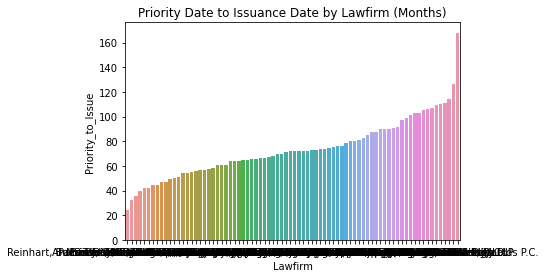

In [210]:
sns.barplot(x='Lawfirm', y='Priority_to_Issue', data=pat_by_lawfirm[pat_by_lawfirm.Priority_to_Issue.notnull()]).set(title='Priority Date to Issuance Date by Lawfirm (Months)')

### Look at Priority to Issue by Attorney

In [211]:
pat_by_attorney = df_pat.groupby('Attorney').agg({'Priority_to_Issue':'mean', 'Primary_Key':'count'}).reset_index().set_axis(['Attorney', 'Priority_to_Issue', 'total_patent'], axis=1).sort_values('Priority_to_Issue')
pat_by_attorney

,Attorney,Priority_to_Issue,total_patent
96,"Kitchell, Barbara",18.000000,7
26,"Brennan, Jack",18.000000,4
61,"Gagala, Bruce",21.000000,2
81,"Hill, Philip",23.000000,1
134,"Peterson, Jeffrey",24.333333,5
28,"Brown, Jeffrey",27.300000,33
39,"Cohen, Eric",32.125000,11
38,"Christensen, Jon",33.800000,11
9,"Bell, Callie",37.000000,7
140,"Rauch, John",38.000000,2


[Text(0.5, 1.0, 'Priority Date to Issuance Date by Attorney (Months)')]

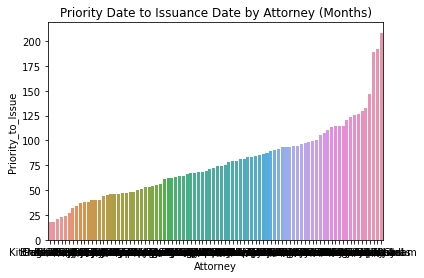

In [212]:
sns.barplot(x='Attorney', y='Priority_to_Issue', data=pat_by_attorney[pat_by_attorney.Priority_to_Issue.notnull()]).set(title='Priority Date to Issuance Date by Attorney (Months)')

### Look at patent success rate. Team to export tables and send for review 

#### Overall patent success rate. We should remove the more recent cases (choose cutoff date for minimum time by looking at data). Pull out earliest issuance date within a family. 

In [213]:
len(df_pat[df_pat['Patent_Status']==1])/len(df_pat)*100

14.093173161441547

#### Patent success rate by lawfirm

In [214]:
pat_by_lawfirm = pat_by_lawfirm.merge(df_pat[df_pat['Patent_Status']==1].groupby('Lawfirm').agg({'Primary_Key':'count'}).reset_index(), how='left')
pat_by_lawfirm = pat_by_lawfirm.rename({'Primary_Key':'success_patent'},axis=1)
pat_by_lawfirm['success_patent']=pat_by_lawfirm.success_patent.fillna(0)

In [215]:
pat_by_lawfirm

,Lawfirm,Priority_to_Issue,total_patent,success_patent
0,"Baniak, Pine & Gannon",24.000000,2,0.0
1,Joan Pennington,32.333333,4,1.0
2,"Reinhart, Boerner, Van Deuren, Norris & Riesel...",35.500000,12,0.0
3,No Lawfirm,39.983051,266,11.0
4,"Andrus Intellectual Property Law, LLP",42.000000,3,1.0
5,"Pacific Biosciences of California, Inc.",42.000000,3,1.0
6,Marine Biological Laboratory (MBL),44.583333,14,6.0
7,Schwarz & Partner Patentanwalte,44.750000,12,1.0
8,TechLaw Ventures,46.750000,6,4.0
9,"J. Bennett Mullinax, LLC",47.000000,1,1.0


In [216]:
pat_by_lawfirm['success_rate']=pat_by_lawfirm['success_patent']/pat_by_lawfirm['total_patent']
pat_by_lawfirm

,Lawfirm,Priority_to_Issue,total_patent,success_patent,success_rate
0,"Baniak, Pine & Gannon",24.000000,2,0.0,0.000000
1,Joan Pennington,32.333333,4,1.0,0.250000
2,"Reinhart, Boerner, Van Deuren, Norris & Riesel...",35.500000,12,0.0,0.000000
3,No Lawfirm,39.983051,266,11.0,0.041353
4,"Andrus Intellectual Property Law, LLP",42.000000,3,1.0,0.333333
5,"Pacific Biosciences of California, Inc.",42.000000,3,1.0,0.333333
6,Marine Biological Laboratory (MBL),44.583333,14,6.0,0.428571
7,Schwarz & Partner Patentanwalte,44.750000,12,1.0,0.083333
8,TechLaw Ventures,46.750000,6,4.0,0.666667
9,"J. Bennett Mullinax, LLC",47.000000,1,1.0,1.000000


### Why is there a max total_patent of 1877 when there are only 120 patents? Same question for success_patent column

In [217]:
pat_by_lawfirm.describe()

,Priority_to_Issue,total_patent,success_patent,success_rate
count,78.000000,121.000000,121.000000,121.000000
mean,73.611957,56.413223,7.950413,0.139252
std,23.833247,196.489638,32.555555,0.236810
min,24.000000,1.000000,0.000000,0.000000
25%,57.761364,2.000000,0.000000,0.000000
50%,71.833333,8.000000,0.000000,0.000000
75%,87.544444,24.000000,3.000000,0.200000
max,168.022222,1898.000000,315.000000,1.000000


<AxesSubplot:xlabel='Lawfirm', ylabel='success_rate'>

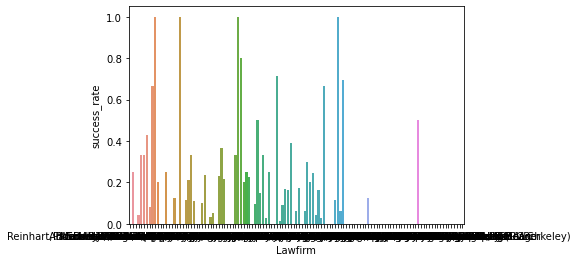

In [218]:
sns.barplot(x='Lawfirm', y='success_rate', data=pat_by_lawfirm[pat_by_lawfirm.success_rate.notnull()])

#### Patent success rate by attorney

In [219]:
pat_by_attorney = pat_by_attorney.merge(df_pat[df_pat['Patent_Status']==1].groupby('Attorney').agg({'Primary_Key':'count'}).reset_index(), how='left')
pat_by_attorney = pat_by_attorney.rename({'Primary_Key':'success_patent'},axis=1)
pat_by_attorney['success_patent']=pat_by_attorney.success_patent.fillna(0)
pat_by_attorney


,Attorney,Priority_to_Issue,total_patent,success_patent
0,"Kitchell, Barbara",18.000000,7,0.0
1,"Brennan, Jack",18.000000,4,0.0
2,"Gagala, Bruce",21.000000,2,0.0
3,"Hill, Philip",23.000000,1,0.0
4,"Peterson, Jeffrey",24.333333,5,0.0
5,"Brown, Jeffrey",27.300000,33,8.0
6,"Cohen, Eric",32.125000,11,0.0
7,"Christensen, Jon",33.800000,11,0.0
8,"Bell, Callie",37.000000,7,2.0
9,"Rauch, John",38.000000,2,0.0


In [220]:
pat_by_attorney['success_rate']=pat_by_attorney['success_patent']/pat_by_attorney['total_patent']
pat_by_attorney

,Attorney,Priority_to_Issue,total_patent,success_patent,success_rate
0,"Kitchell, Barbara",18.000000,7,0.0,0.000000
1,"Brennan, Jack",18.000000,4,0.0,0.000000
2,"Gagala, Bruce",21.000000,2,0.0,0.000000
3,"Hill, Philip",23.000000,1,0.0,0.000000
4,"Peterson, Jeffrey",24.333333,5,0.0,0.000000
5,"Brown, Jeffrey",27.300000,33,8.0,0.242424
6,"Cohen, Eric",32.125000,11,0.0,0.000000
7,"Christensen, Jon",33.800000,11,0.0,0.000000
8,"Bell, Callie",37.000000,7,2.0,0.285714
9,"Rauch, John",38.000000,2,0.0,0.000000


### Why is there a max total_patent of 1242 when there are only 197 patents? Same question for success_patent column 

In [221]:
pat_by_attorney.describe()

,Priority_to_Issue,total_patent,success_patent,success_rate
count,88.000000,197.000000,197.000000,197.000000
mean,77.159106,25.162437,3.253807,0.049299
std,37.283462,97.963311,22.948179,0.140307
min,18.000000,1.000000,0.000000,0.000000
25%,48.150000,1.000000,0.000000,0.000000
50%,73.391304,3.000000,0.000000,0.000000
75%,94.752000,11.000000,0.000000,0.000000
max,208.500000,1254.000000,294.000000,1.000000


<AxesSubplot:xlabel='Attorney', ylabel='success_rate'>

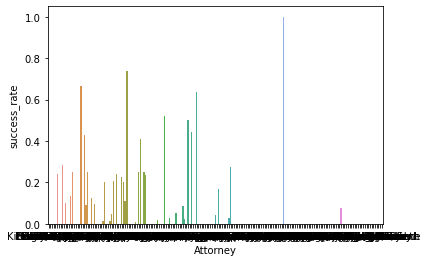

In [222]:
sns.barplot(x='Attorney', y='success_rate', data=pat_by_attorney[pat_by_attorney.success_rate.notnull()])

### Review Patenting Success by Date

In [223]:
df_modeling1 = pd.DataFrame(pd.read_csv("patent_dataset.csv"))

df_modeling1['Actually_File_Date'] = pd.to_datetime(df_modeling1['Actually_File_Date'])

df_modeling1['Date_Threshold'] = np.where(df_modeling1['Actually_File_Date'] > '2012-01-01', "2012-Forward", "Pre-2012")

df_modeling1 = df_modeling1[['Tech_ID', 'Date_Threshold']]

df_pat1 = df_pat.merge(df_modeling1.drop_duplicates(), on=['Tech_ID'], 
                   how='inner', indicator=True)

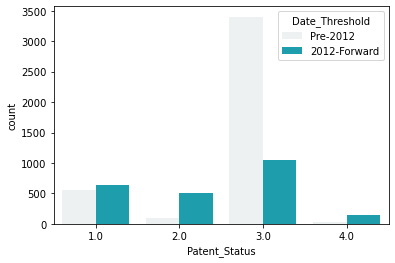

In [226]:
countplt = sns.countplot(x = df_pat1['Patent_Status'], hue = df_pat1["Date_Threshold"], color = '#06b1c4')

In [255]:
pat = df_pat1.groupby(['Date_Threshold', 'Patent_Status']).size().unstack(fill_value=0)
pat.apply(lambda x: x/x.sum(), axis=1)

Patent_Status,1.0,2.0,3.0,4.0
Date_Threshold,,,,
2012-Forward,0.271949,0.216274,0.450964,0.060814
Pre-2012,0.137043,0.022800,0.833783,0.006374


## Technology EDA 

### As expected, Tech_ID has no missing values. A large portion of the values are only missing ~5% of data.

In [228]:
num_missing = df_tech.isnull().sum()
percentage_missing = num_missing/len(df_tech)*100
print(percentage_missing)

Unnamed: 0                                           0.000000
Tech_ID                                              0.000000
Title                                                0.000000
Lic_Manager                                          0.000000
Lead_Inventor                                        2.046559
Status                                               0.025582
Disclosure_Date                                      4.425684
Upload_to_Tech_Publisher                             0.000000
Lic_Manager_Assign_Date                             54.591967
Created_Date                                         0.000000
Updated_Date                                         0.000000
Last_Related_Update                                  0.000000
Division_Department                                 15.067792
Owners                                              70.120235
Alternate_Title                                     17.549245
Categories                                          72.601688
Distribu

### There are a number of binary indicator columns (those with 2 unique vlaues) that may prove useful for modeling 

### Columns with unknown values that we may be able to remove: Upload_to_Tech_Publisher, Distributed, Holdback, Relationship_Key, Relationship_Table, Total_Budget, Licensed, Tech_Finder_Abstract, Primary_Key (Drop somce we will use Tech_ID for merging)

In [229]:
df_tech.nunique()

Unnamed: 0                                          3909
Tech_ID                                             3909
Title                                               3860
Lic_Manager                                           16
Lead_Inventor                                       1030
Status                                                17
Disclosure_Date                                     2740
Upload_to_Tech_Publisher                               2
Lic_Manager_Assign_Date                             1157
Created_Date                                        1651
Updated_Date                                        2717
Last_Related_Update                                 2964
Division_Department                                  301
Owners                                               103
Alternate_Title                                      119
Categories                                            96
Distributed                                           13
Holdback                       

### Drop columns not containing relevant information

In [230]:
df_tech = df_tech.drop('Upload_to_Tech_Publisher', 1)
df_tech = df_tech.drop('Distributed', 1)
df_tech = df_tech.drop('Holdback', 1)
df_tech = df_tech.drop('Relationship_Key', 1)
df_tech = df_tech.drop('Relationship_Table', 1)
df_tech = df_tech.drop('Total_Budget', 1)
df_tech = df_tech.drop('Licensed', 1)
df_tech = df_tech.drop('Tech_Finder_Abstract', 1)
df_tech = df_tech.drop('Primary_Key', 1)

### Dataset looks to be largely populated, except for a particular stretch with a large swath of missing data. Appears to start at Total Budget column. Could not find any commonality in rows with missing data 

### This is probably a mix of very old and very new data where cleaning/updates have not yet occurred. A lot of these cases have a disclosure date of 2022. 

<AxesSubplot:>

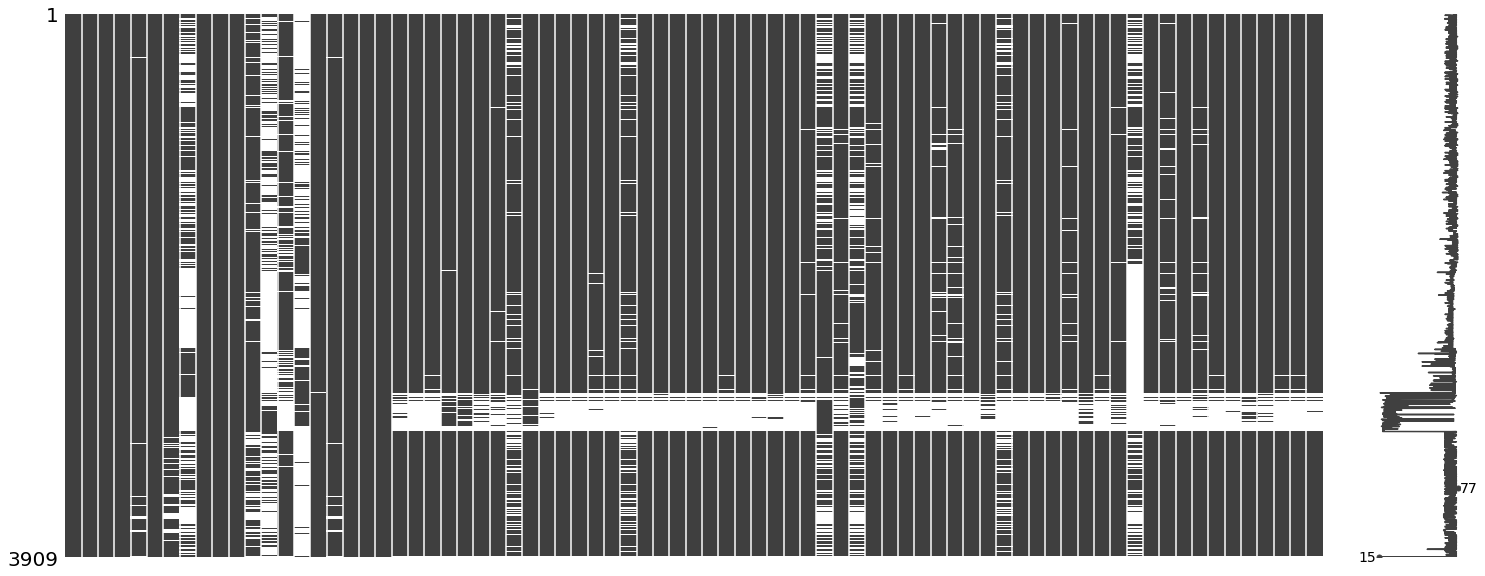

In [231]:
# Gives positional information of the missing values
msno.matrix(df_tech)

<AxesSubplot:>

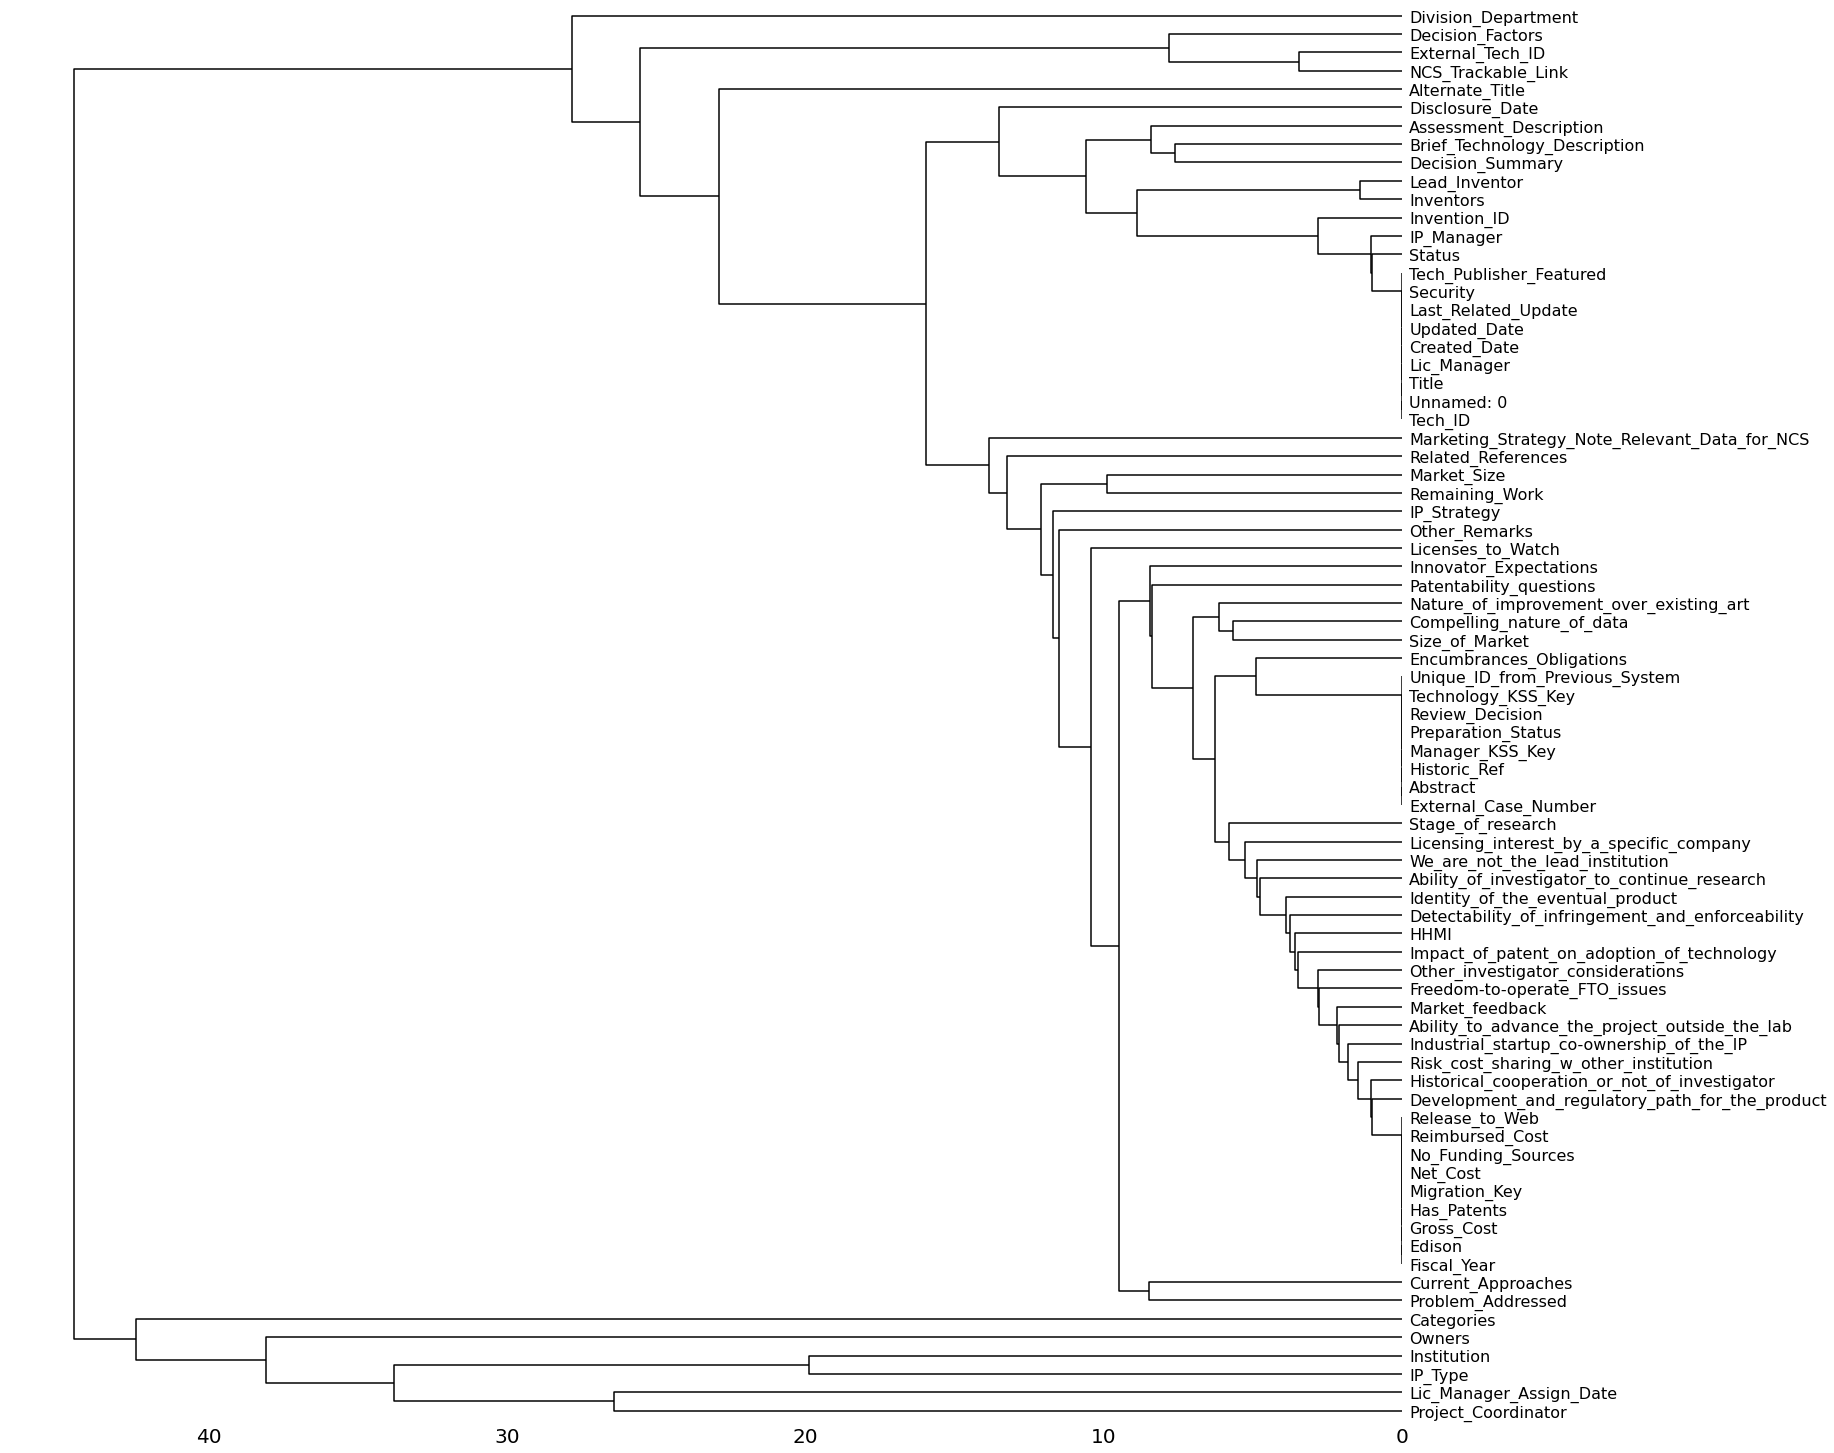

In [232]:
msno.dendrogram(df_tech)

### Convert date fields to DateTime. Is there not a Licensed Date field? There is in the Agreement dataset which we will need to merge in 

In [233]:
# Date fields of interest identified by the Polsky Center 
df_tech['Disclosure_Date'] = pd.to_datetime(df_tech['Disclosure_Date'])
df_tech['Lic_Manager_Assign_Date'] = pd.to_datetime(df_tech['Lic_Manager_Assign_Date'])
df_tech['Created_Date'] = pd.to_datetime(df_tech['Created_Date'])
df_tech['Updated_Date'] = pd.to_datetime(df_tech['Updated_Date'])
df_tech['Last_Related_Update'] = pd.to_datetime(df_tech['Last_Related_Update'])

# Confirm that date fields have been converted 
df_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 77 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Unnamed: 0                                        3909 non-null   int64         
 1   Tech_ID                                           3909 non-null   object        
 2   Title                                             3909 non-null   object        
 3   Lic_Manager                                       3909 non-null   object        
 4   Lead_Inventor                                     3829 non-null   object        
 5   Status                                            3908 non-null   object        
 6   Disclosure_Date                                   3736 non-null   datetime64[ns]
 7   Lic_Manager_Assign_Date                           1775 non-null   datetime64[ns]
 8   Created_Date                

### Consolidate Division_Department into Primary Divisions

In [240]:
# Only keeping major divisions with sufficient number of patents; in case of multiple divisions, search through the
# list of divisions in the order of the following dict
division_mapping = {'PSD':'PSD', 
                    'BSD':'BSD', 
                    'PME':'PME', 
                    'Argonne National Laboratory':'ANL', 
                    'Marine Biological Laboratory':'MBL', 
                    'Booth':'Booth', 
                    'University of Chicago Hospital':'UCH', 
                    'SSD':'SSD', 
                    'Comprehensive Cancer Center':'CCC', 
                    'University of Chicago':'UC',
                    'Toyota Technological Institute':'TTI', 
                    'Humanities':'Humanities', 
                    'Harris':'Harris',
                    'Institute of Politics':'Politics'}

df_tech.loc[df_tech['Division_Department'].isnull()] = 'NA'

df_tech['Primary_Division'] = 'Others'
df_tech.loc[df_tech['Division_Department']=='NA', 'Primary_Division'] = 'NA'

for i in range(len(df_tech)):
    for key in division_mapping:
        if key in df_tech['Division_Department'][i]:
            df_tech['Primary_Division'][i] = division_mapping.get(key)
            break;
            
# Any Divisions with less than 0.5% of total records will be consolidated into 'Other' category 
other = ('Humanities', 'SSD', 'UCH', 'Booth', 'UC', 'Harris', 'TTI', 'CCC', 'Others', 'PME', 'ANL', 'NA', 'MBL', 'Politics')

df_tech.loc[df_tech['Primary_Division'].isin(other), 'Primary_Division'] = 'Other'

# Confrim changes, % breakout
df_tech['Primary_Division'].value_counts()/len(df_tech)*100

BSD      60.706063
Other    23.407521
PSD      15.886416
Name: Primary_Division, dtype: float64

### Add Licensed Indicator Column. Need clarification on the following: Combined with other Tech, Jointly Owned - Other Party Leads, Awaiting Info from Inventors, Negotiating License

In [241]:
df_tech['Status'].value_counts()

Closed/Inactive                      1897
NA                                    589
Seeking Licensees                     405
Exclusively Licensed                  308
Licenses at Potential                 178
Waived Rights to Inventor             107
Post Election Hold                     80
Pending Title Election Decision        65
Non-Exclusively Licensed               64
Awaiting Expiration                    48
Combined with other Tech               48
Jointly Owned - Other Party Leads      36
Awaiting Info from Inventors           27
IP Authorized                          27
Negotiating License                    22
Optioned                                5
Jointly Owned - UoC Leads               2
IIA - Other Party Leads                 1
Name: Status, dtype: int64

In [242]:
# Generate lists for the will never be licensed, could be licensed, igone, and licensed statuses
licensed = ('Non-Exclusively Licensed', 'Exclusively Licensed', 'Optioned')
could_license = ('Seeking Licensees', 'Post Election Hold', 'IP Authorized', 'Pending Title Election Decision')
never_licensed = ('Closed/Inactive', 'Waived Rights to Inventor', 'Awaiting Expiration')
ignore = ('Licenses at Potential', 'IIA - Other Party Leads', 'Jointly Owned - UoC Leads', 'Combined with other Tech', 'Jointly Owned - Other Party Leads', 'Awaiting Info from Inventors', 'Negotiating License')

df_tech.loc[df_tech['Status'].isin(licensed), 'License_Status'] = 1
df_tech.loc[df_tech['Status'].isin(could_license), 'License_Status'] = 2
df_tech.loc[df_tech['Status'].isin(never_licensed), 'License_Status'] = 3
df_tech.loc[df_tech['Status'].isin(ignore), 'License_Status'] = 4

### As expected, the large majority of cases will never be licensed. Approximately 25% of cases could or have been licensed. We are currently ignoring 9% of cases and need to determine if these can be dropped

In [243]:
df_tech['License_Status'].value_counts()/len(df_tech)*100

3.0    52.494244
2.0    14.760808
1.0     9.644410
4.0     8.032745
Name: License_Status, dtype: float64

Text(0.5, 1.0, 'License_Status Distribution')

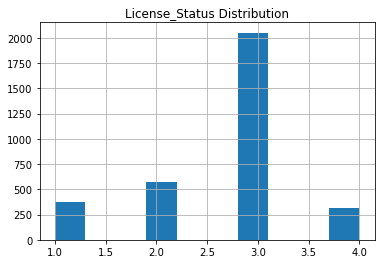

In [245]:
df_tech['License_Status'].hist()
plt.title("License_Status Distribution")

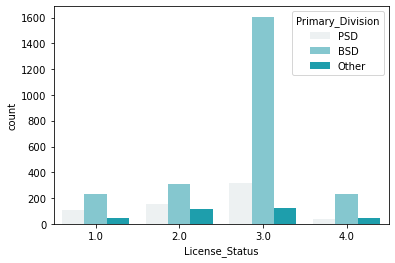

In [246]:
countplt = sns.countplot(x = df_tech['License_Status'], hue = df_tech["Primary_Division"], color = '#06b1c4')

In [247]:
lic = df_tech.groupby(['Primary_Division', 'License_Status']).size().unstack(fill_value=0)
# lic = lic.set_index('Primary_Division', 'License_Status')
# lic.div(lic.sum(axis=1), axis=0)
lic.apply(lambda x: x/x.sum(), axis=1)

License_Status,1.0,2.0,3.0,4.0
Primary_Division,,,,
BSD,0.096081,0.129794,0.676780,0.097345
Other,0.128834,0.358896,0.383436,0.128834
PSD,0.172303,0.244767,0.516908,0.066023


### Add Date Threshold for Licensing status by threshold 

In [248]:
df_modeling = pd.DataFrame(pd.read_csv("licensing_dataset.csv"))

df_modeling['Actually_File_Date'] = pd.to_datetime(df_modeling['Actually_File_Date'])

df_modeling['Date_Threshold'] = np.where(df_modeling['Actually_File_Date'] > '2012-01-01', "2012-Forward", "Pre-2012")

df_modeling = df_modeling[['Tech_ID', 'Date_Threshold']]

df_tech1 = df_tech.merge(df_modeling.drop_duplicates(), on=['Tech_ID'], 
                   how='inner', indicator=True)

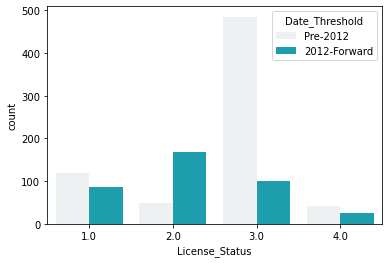

In [249]:
countplt = sns.countplot(x = df_tech1['License_Status'], hue = df_tech1["Date_Threshold"], color = '#06b1c4')

In [256]:
lic = df_tech1.groupby(['Date_Threshold', 'License_Status']).size().unstack(fill_value=0)
lic.apply(lambda x: x/x.sum(), axis=1)

License_Status,1.0,2.0,3.0,4.0
Date_Threshold,,,,
2012-Forward,0.225722,0.443570,0.262467,0.068241
Pre-2012,0.171717,0.069264,0.699856,0.059163


### There is only one case where there is not an associated Licensing Status (outlined below for review)

In [54]:
print('Null values in License_Status column:', df_tech.License_Status.isnull().sum())
print('Null values in Status column:', df_tech.Status.isnull().sum())

Null values in License_Status column: 1
Null values in Status column: 1


In [55]:
df_tech[df_tech['License_Status'].isna()]

,Unnamed: 0,Tech_ID,Title,Lic_Manager,Lead_Inventor,Status,Disclosure_Date,Lic_Manager_Assign_Date,Created_Date,Updated_Date,...,Release_to_Web,Remaining_Work,Review_Decision,Risk_cost_sharing_w_other_institution,Size_of_Market,Stage_of_research,Technology_KSS_Key,Unique_ID_from_Previous_System,We_are_not_the_lead_institution,License_Status
3850,3850,9999,Holding Technology,"Unassigned, Unassigned",NaN,NaN,NaT,NaT,2018-04-12 17:51:03,2020-10-02 18:45:07,...,No,NaN,,No,No,No,,,No,NaN


### Create a df converting categorical variables to numeric for correlation analysis

In [56]:
df_tech_num = df_tech.copy()

df_tech_num['Lic_Manager'] =df_tech_num['Lic_Manager'].astype('category').cat.codes
df_tech_num['Division_Department'] =df_tech_num['Division_Department'].astype('category').cat.codes
df_tech_num['Owners'] =df_tech_num['Owners'].astype('category').cat.codes
df_tech_num['Categories'] =df_tech_num['Categories'].astype('category').cat.codes
df_tech_num['IP_Manager'] =df_tech_num['IP_Manager'].astype('category').cat.codes
df_tech_num['Tech_Publisher_Featured'] =df_tech_num['Tech_Publisher_Featured'].astype('category').cat.codes
df_tech_num['Ability_of_investigator_to_continue_research'] =df_tech_num['Ability_of_investigator_to_continue_research'].astype('category').cat.codes
df_tech_num['Ability_to_advance_the_project_outside_the_lab'] =df_tech_num['Ability_to_advance_the_project_outside_the_lab'].astype('category').cat.codes
df_tech_num['Compelling_nature_of_data'] =df_tech_num['Compelling_nature_of_data'].astype('category').cat.codes
df_tech_num['Detectability_of_infringement_and_enforceability'] =df_tech_num['Detectability_of_infringement_and_enforceability'].astype('category').cat.codes
df_tech_num['Development_and_regulatory_path_for_the_product'] =df_tech_num['Development_and_regulatory_path_for_the_product'].astype('category').cat.codes
df_tech_num['Edison'] =df_tech_num['Edison'].astype('category').cat.codes
df_tech_num['Freedom-to-operate_FTO_issues'] =df_tech_num['Freedom-to-operate_FTO_issues'].astype('category').cat.codes
df_tech_num['Has_Patents'] =df_tech_num['Has_Patents'].astype('category').cat.codes
df_tech_num['HHMI'] =df_tech_num['HHMI'].astype('category').cat.codes
df_tech_num['Historical_cooperation_or_not_of_investigator'] =df_tech_num['Historical_cooperation_or_not_of_investigator'].astype('category').cat.codes
df_tech_num['Identity_of_the_eventual_product'] =df_tech_num['Identity_of_the_eventual_product'].astype('category').cat.codes
df_tech_num['Impact_of_patent_on_adoption_of_technology'] =df_tech_num['Impact_of_patent_on_adoption_of_technology'].astype('category').cat.codes
df_tech_num['Industrial_startup_co-ownership_of_the_IP'] =df_tech_num['Industrial_startup_co-ownership_of_the_IP'].astype('category').cat.codes
df_tech_num['Institution'] =df_tech_num['Institution'].astype('category').cat.codes
df_tech_num['Licensing_interest_by_a_specific_company'] =df_tech_num['Licensing_interest_by_a_specific_company'].astype('category').cat.codes
df_tech_num['Market_feedback'] =df_tech_num['Market_feedback'].astype('category').cat.codes
df_tech_num['Market_Size'] =df_tech_num['Market_Size'].astype('category').cat.codes
df_tech_num['Nature_of_improvement_over_existing_art'] =df_tech_num['Nature_of_improvement_over_existing_art'].astype('category').cat.codes
df_tech_num['No_Funding_Sources'] =df_tech_num['No_Funding_Sources'].astype('category').cat.codes
df_tech_num['Other_investigator_considerations'] =df_tech_num['Other_investigator_considerations'].astype('category').cat.codes
df_tech_num['Patentability_questions'] =df_tech_num['Patentability_questions'].astype('category').cat.codes
df_tech_num['Preparation_Status'] =df_tech_num['Preparation_Status'].astype('category').cat.codes
df_tech_num['Project_Coordinator'] =df_tech_num['Project_Coordinator'].astype('category').cat.codes
df_tech_num['Release_to_Web'] =df_tech_num['Release_to_Web'].astype('category').cat.codes
df_tech_num['Review_Decision'] =df_tech_num['Review_Decision'].astype('category').cat.codes
df_tech_num['Risk_cost_sharing_w_other_institution'] =df_tech_num['Risk_cost_sharing_w_other_institution'].astype('category').cat.codes
df_tech_num['Size_of_Market'] =df_tech_num['Size_of_Market'].astype('category').cat.codes
df_tech_num['Stage_of_research'] =df_tech_num['Stage_of_research'].astype('category').cat.codes
df_tech_num['We_are_not_the_lead_institution'] =df_tech_num['We_are_not_the_lead_institution'].astype('category').cat.codes

### Identify highly correlated features and remove 

In [57]:
# Create correlation matrix
corr_matrix = df_tech_num.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [58]:
to_drop

['Development_and_regulatory_path_for_the_product',
 'Historical_cooperation_or_not_of_investigator',
 'Industrial_startup_co-ownership_of_the_IP',
 'Market_feedback',
 'No_Funding_Sources',
 'Preparation_Status',
 'Project_Coordinator',
 'Reimbursed_Cost',
 'Risk_cost_sharing_w_other_institution']

In [59]:
# Drop features 
df_tech_num.drop(to_drop, axis=1, inplace=True)

### Identify features highly correlated with License_Status. No one column has a high positive correlation with License_Status. Several with a relatively strong negative correlation include Migration_Key, Institution, Fiscal_Year, and Categories. Migation_Key may be a field added for the transition to Minuet. There is a good chance that Migration_Key correlation could be attributed to age, which we may want to add. March 9 looks to be the last time a Migration Key was added 

In [60]:
df_tech_num[df_tech_num.columns[1:]].corr()['License_Status'][:]

Lic_Manager                                         0.056896
Division_Department                                -0.124322
Owners                                             -0.127631
Categories                                         -0.203975
IP_Manager                                          0.048755
Tech_Publisher_Featured                            -0.031386
Ability_of_investigator_to_continue_research        0.057055
Ability_to_advance_the_project_outside_the_lab      0.091079
Compelling_nature_of_data                           0.045315
Detectability_of_infringement_and_enforceability    0.083306
Edison                                             -0.043831
Fiscal_Year                                        -0.195926
Freedom-to-operate_FTO_issues                       0.106076
Gross_Cost                                         -0.126133
Has_Patents                                        -0.097242
HHMI                                                0.063345
Identity_of_the_eventual

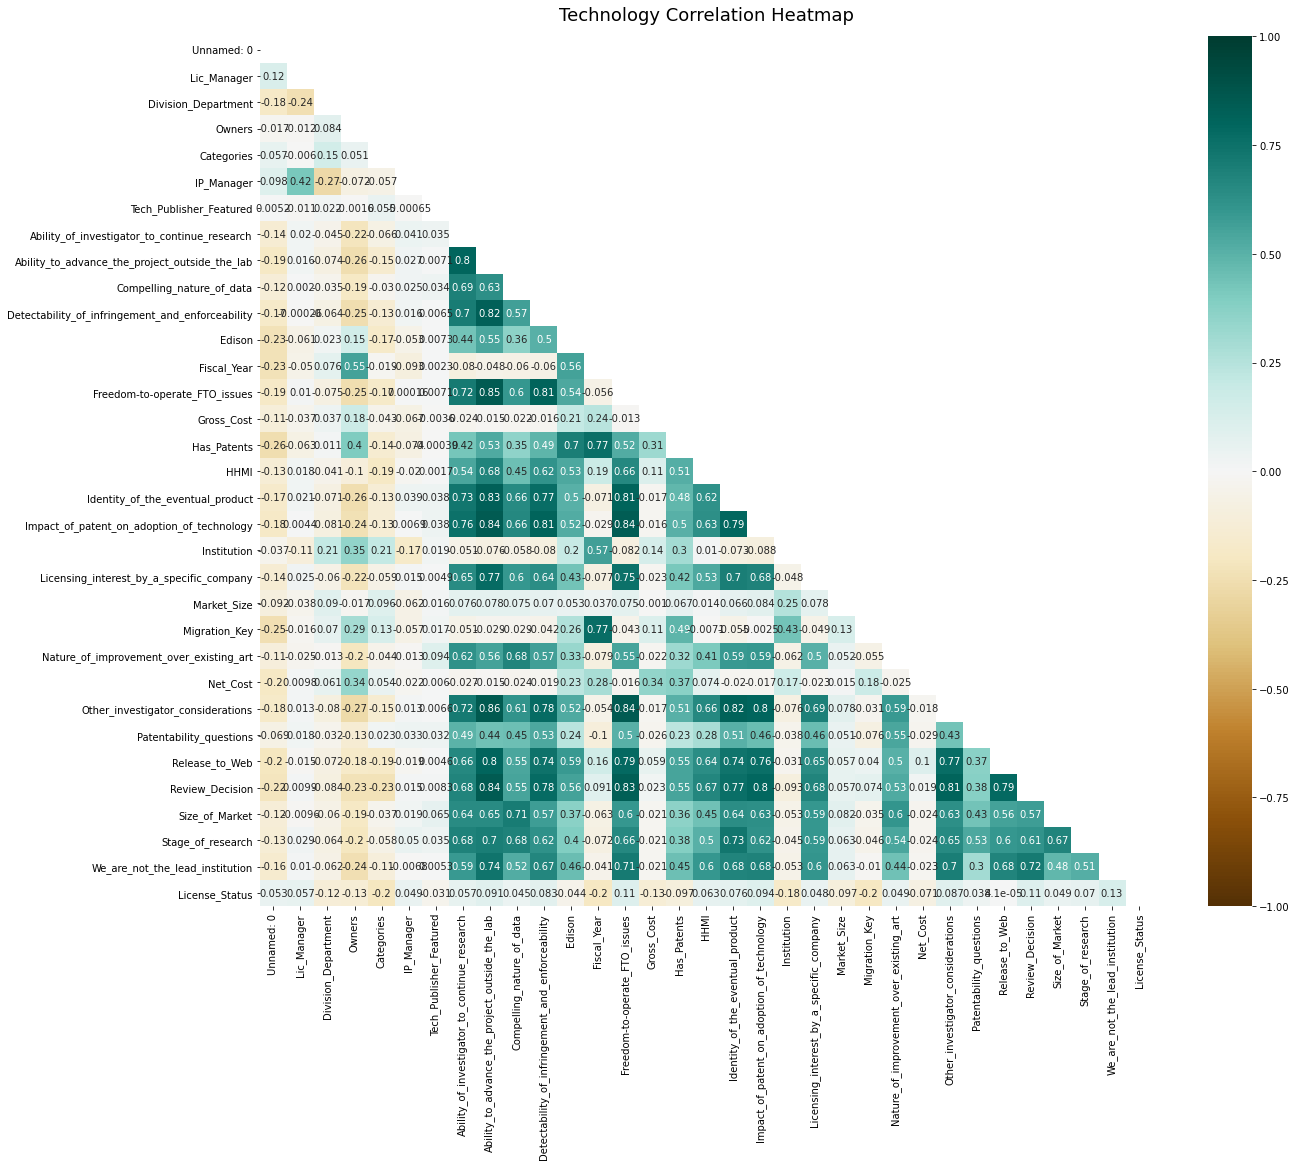

In [61]:
plt.figure(figsize=(20, 16))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_tech_num.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_tech_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Technology Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<AxesSubplot:>

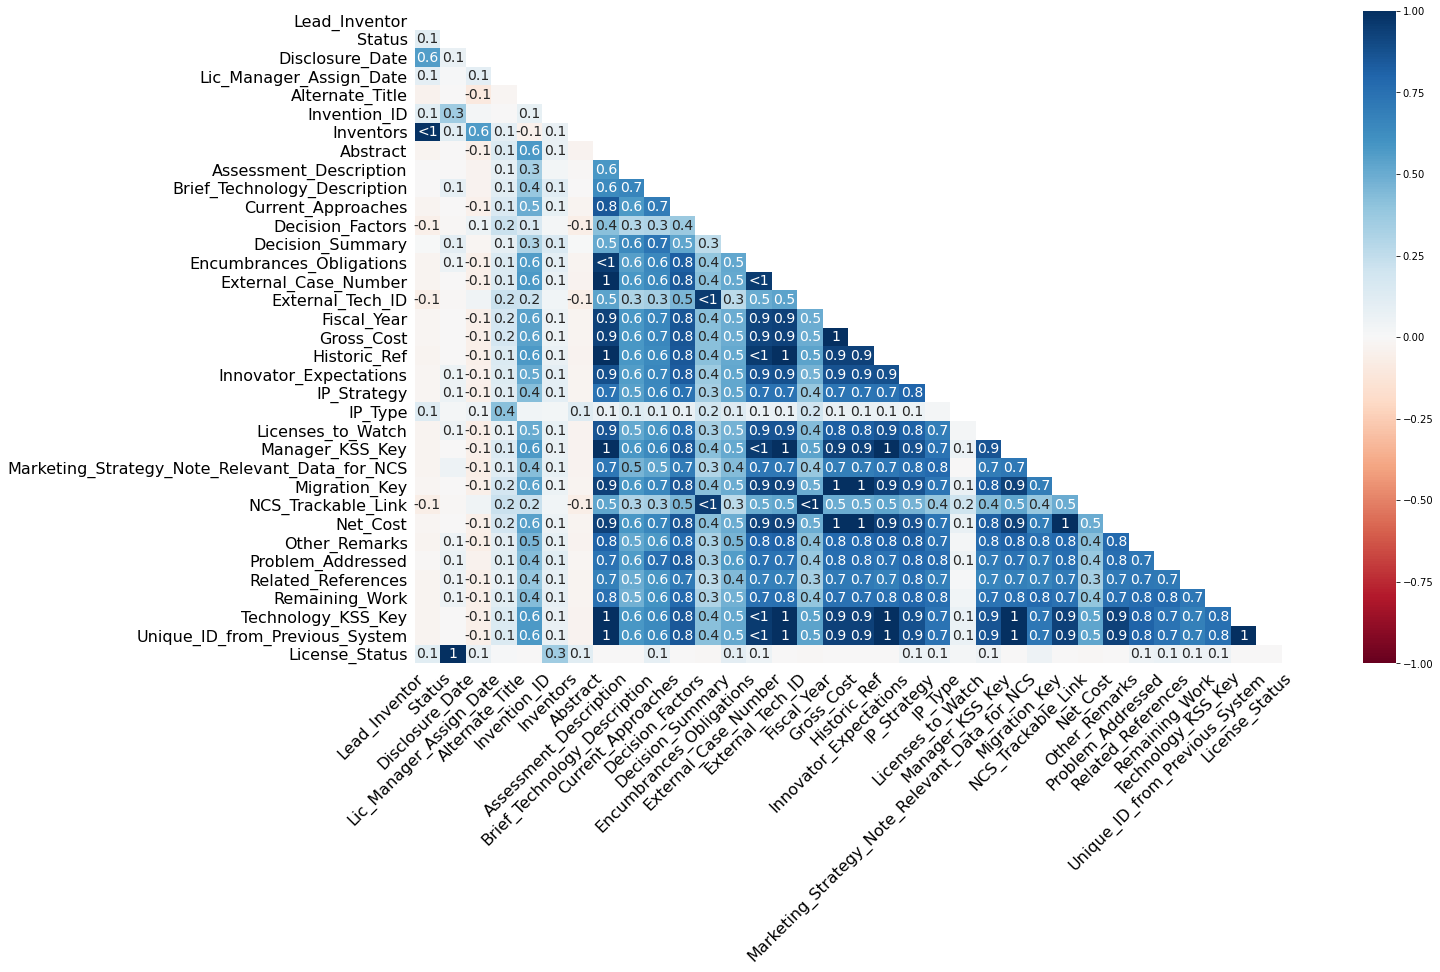

In [62]:
# Gives a heatmap of how missing values are related
msno.heatmap(df_tech_num)

## Gather Net Cost for Technologies from the last 5 years  

In [63]:
df_tech_17 = df_tech[(df_tech['Disclosure_Date'] > '2017-01-01')]

In [64]:
df_tech_17.nunique()

Unnamed: 0                                          820
Tech_ID                                             820
Title                                               813
Lic_Manager                                          13
Lead_Inventor                                       319
Status                                               17
Disclosure_Date                                     578
Lic_Manager_Assign_Date                             291
Created_Date                                        717
Updated_Date                                        773
Last_Related_Update                                 809
Division_Department                                 159
Owners                                               54
Alternate_Title                                      72
Categories                                           78
Invention_ID                                        816
Inventors                                           695
IP_Manager                                      